In [1]:
from typing import List, Tuple, Union
import matplotlib.pyplot as plt
def fast_hist(array: List[Union[int, float]], 
              bins: int) -> Tuple[List[float], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists: 
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    array.sort()
    bin_counts = [0.0] * bins
    bin_labels = []
    bin_width = (array[len(array)-1] - array[0]) / bins
    bin_labels.append(float(array[0]))
    for i in range(1, bins + 1):
        bin_labels.append(bin_labels[i - 1] + bin_width)
        
    j = 0
    i = 0
    while  i < len(array) and j < len(bin_labels) - 1:    
        if array[i] <= bin_labels[j + 1]:
            bin_counts[j] += 1.0
            i += 1
        else: 
            j += 1
    
    return (bin_counts, bin_labels)

Значения колонок: [14.]
Названия колонок: [1.5 2.5]


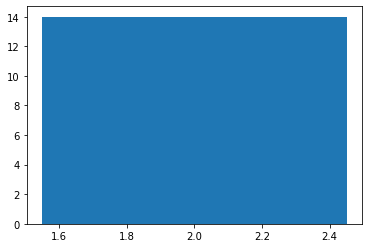

In [7]:
import numpy as np
from random import randint
size = randint(50, 100)
arr = []
for i in range(size):
    arr.append(randint(0, 25))
arr = [2, 2, 2, 2,2, 2,2, 2,2, 2,2, 2,2, 2]
value_counts, bins_names, visual_figure = plt.hist(arr, 
                                                   bins=len(set(arr)), 
                                                   rwidth=0.9)
# Параметр rwidth и визуализацию в своей функции реализовывать не требуется
print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

In [8]:
value_counts, bins_names = fast_hist(arr, bins=len(set(arr)))     

print('Значения колонок:', value_counts)
print('Названия колонок:', bins_names)

Значения колонок: [14.0]
Названия колонок: [2.0, 2.0]


<BarContainer object of 1 artists>

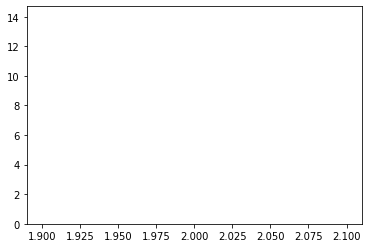

In [9]:
bin_width = bins_names[1] - bins_names[0]
plt.bar(np.array(bins_names[:len(value_counts)]), np.array(value_counts), width=bin_width*0.9, align='edge')   

In [5]:
%timeit np.histogram_bin_edges(arr, bins=len(set(arr)))

64.9 µs ± 2.38 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [6]:
%timeit fast_hist(arr, bins=len(set(arr)))

21.1 µs ± 817 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
